<a href="https://colab.research.google.com/github/brishti-c/undergrad_ml_assignments/blob/main/01_assignment_wrangling_and_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

In [1]:
import pandas as pd
import numpy as np
! git clone https://github.com/brishti-c/scratchpad
%run ./scratchpad/get_data.py

Cloning into 'scratchpad'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 33 (delta 9), reused 5 (delta 5), pack-reused 19 (from 1)
Receiving objects: 100% (33/33), 48.79 KiB | 1.68 MiB/s, done.
Resolving deltas: 100% (10/10), done.
Download complete
Extracting data files...
Data extracted


**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)

The values in 'Price' have commas when they are above 999. I thus cleaned the data by removing the commas and then converting the datatype of 'Price' from object to float, since I didn't want to remove any of the higher priced locations. I had no missing values at the end of the cleaning.

2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.

The proportion missing is 0.7619. The cross-tabulation shows that missing injury data are concentrated in specific force types, particularly bodily force, chemical irritant, and maximal restraint technique, indicating that injury reporting is inconsistent and somewhat related to the severity or classification of force used.

3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.

4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

There are 8323 missing values, and the median without the missing values is 94.0. This bias may negatively impact the results because median imputation reduces variance, making listings appear more similar than they really are, since missing reviews are often systematic (e.g., new listings), not random, and the values missing are less likely to be close to the median (one can assume that quite a bit of the AirBnBs that do not provide data are going to be on either end, as they are either too unknown/run down or too expensive and exclusive).


In [2]:
df = pd.read_csv('/content/data/airbnb_NYC.csv', encoding='latin1')

print("Original:")
print(df['Price'].unique())

df['Price'] = (
    df['Price']
    .astype(str)
    .str.replace(',', '', regex=True)
    .astype(float)
)

print("Cleaned:")
print(df['Price'].unique())
missing_count = df['Price'].isna().sum()
print(f"Missing values after cleaning: {missing_count}")

Original:
['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1,990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300' '289' '179' '98' '195' '29' '27' '39'
 '249' '192' '142' '169' '1,000' '131' '138' '113' '122' '329' '101' '475'
 '238' '272' '308' '126' '235' '315' '248' '128' '56' '207' '450' '215'
 '210' '385' '445' '136' '247' '118' '77' '76' '92' '198' '205' '299'
 '222' '245' '104' '153' '349' '114' '320' '292' '226' '420' '500' '325'
 '307' '78' '265' '108' '123' '189' '32' '58' '86' '219' '800' '335' '63'
 '229' '425' '67' '87' '1,200' '158' '650' '234' '310' '695' '400' '166'
 '119' '62' '168' '340' '479' '43' '395' '

In [3]:
df = pd.read_csv('/content/data/mn_police_use_of_force.csv', encoding='latin1')

df["subject_injury"] = df["subject_injury"].map({
    "Yes": "Yes",
    "No": "No"
})

df["subject_injury"] = df["subject_injury"].fillna("Missing")

missing_proportion = (df['subject_injury'] == 'Missing').mean()

print(f"Proportion of 'Missing' values in subject_injury: {missing_proportion:.4f} ({missing_proportion:.2%})")

print(pd.crosstab(df["force_type"], df["subject_injury"]))


Proportion of 'Missing' values in subject_injury: 0.7619 (76.19%)
subject_injury               Missing    No   Yes
force_type                                      
Baton                              2     0     2
Bodily Force                    7051  1093  1286
Chemical Irritant               1421   131    41
Firearm                            0     2     0
Gun Point Display                 27    33    44
Improvised Weapon                 74    34    40
Less Lethal                       87     0     0
Less Lethal Projectile             0     1     2
Maximal Restraint Technique      170     0     0
Police K9 Bite                    31     2    44
Taser                            985   150   172


In [4]:
df = pd.read_csv('/content/data/metabric.csv', encoding='latin1')

print("Original:")
print(df['Overall Survival Status'].unique())

df['survival_dummy'] = df['Overall Survival Status'].map({
    '0:LIVING': 1,      # Living = 1
    '1:DECEASED': 0
})

df['Overall Survival Status'] = df['survival_dummy']
df = df.drop('survival_dummy', axis=1)

print("Cleaned:")
print(df['Overall Survival Status'].unique())

Original:
['0:LIVING' '1:DECEASED']
Cleaned:
[1 0]


In [5]:
df = pd.read_csv('/content/data/airbnb_NYC.csv', encoding='latin1')

print("Number of values missing: " + str(df["Review Scores Rating"].isna().sum()))

median_score = df["Review Scores Rating"].median()
df["Review Scores Rating_imputed"] = (
    df["Review Scores Rating"].fillna(median_score)
)

print("Median: " + str(median_score))

Number of values missing: 8323
Median: 94.0


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?

2. Drop any columns that do not contain data.

3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.

An observation in this dataset is one shark attack incident. Each row corresponds to a single documented encounter between a human and a shark, with attributes such as year, location, victim age, activity, type of attack, and whether it was fatal. This definition affects cleaning and analysis choices because: each row must be preserved as a unique event, and aggregations (such as counts by year or proportions of fatal attacks) are valid only if one row equals one incident.

4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?

It increased over time for a while, but then decreased again in the middle of the 2010s.

5. Clean the Age variable and make a histogram of the ages of the victims.

6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?

The proprotion is 0.7450

7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.

8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

The attack seems to be more likely to be fatal when unprovoked, as 2% of the provoked attacks were fatal while 16% of unprovoked attacks were fatal. This could have to do with the way the attacks were recorded (provoked attacks were not evenly recorded, maybe) and with the fact that people would be more prepared for an attack if they provoke a shark.

In [6]:
import pandas as pd

df = pd.read_excel("/content/GSAF5.xls")

df = df.replace(r"^\s*$", pd.NA, regex=True)
df = df.loc[:, ~df.columns.str.match(r"^Unnamed")]
drop_cols = [
    "href", "href formula", "pdf",
    "Case Number.1", "Case Number", "original order"
]

df = df.drop(columns=[c for c in drop_cols if c in df.columns])

df.head(20)

FileNotFoundError: [Errno 2] No such file or directory: '/content/GSAF5.xls'

In [106]:
print("Original:")
print(df['Year'].unique())

df = df.dropna(subset=['Year'])

df['Year'] = (
    df['Year']
    .astype(int)
)

df = df[df['Year'] >= 1940]

print("Cleaned:")
print(df['Year'].unique())

attacks_by_year = (
    df.groupby('Year')
      .size()
      .reset_index(name='num_attacks')
)

attacks_by_year.head(86)

Original:
[2026. 2016. 2025. 2024. 2023. 2022. 2021. 2020. 2019. 2018. 2017.   nan
 2015. 2014. 2013. 2012. 2011. 2010. 2009. 2008. 2007. 2006. 2005. 2004.
 2003. 2002. 2001. 2000. 1999. 1998. 1997. 1996. 1995. 1984. 1994. 1993.
 1992. 1991. 1990. 1989. 1969. 1988. 1987. 1986. 1985. 1983. 1982. 1981.
 1980. 1979. 1978. 1977. 1976. 1975. 1974. 1973. 1972. 1971. 1970. 1968.
 1967. 1966. 1965. 1964. 1963. 1962. 1961. 1960. 1959. 1958. 1957. 1956.
 1955. 1954. 1953. 1952. 1951. 1950. 1949. 1948. 1848. 1947. 1946. 1945.
 1944. 1943. 1942. 1941. 1940. 1939. 1938. 1937. 1936. 1935. 1934. 1933.
 1932. 1931. 1930. 1929. 1928. 1927. 1926. 1925. 1924. 1923. 1922. 1921.
 1920. 1919. 1918. 1917. 1916. 1915. 1914. 1913. 1912. 1911. 1910. 1909.
 1908. 1907. 1906. 1905. 1904. 1903. 1902. 1901. 1900. 1899. 1898. 1897.
 1896. 1895. 1894. 1893. 1892. 1891. 1890. 1889. 1888. 1887. 1886. 1885.
 1884. 1883. 1882. 1881. 1880. 1879. 1878. 1877. 1876. 1875. 1874. 1873.
 1872. 1871. 1870. 1869. 1868. 1867. 1866

,Year,num_attacks
0,1940,24
1,1941,27
2,1942,41
3,1943,28
4,1944,31
...,...,...
81,2021,111
82,2022,98
83,2023,109
84,2024,52


Original:
['13' '?' '39' '11' '27' '12' '56' '55' '24' '26' '25' '61' '40' '14'
 '50+' '54' '48' '57' '8' '63' '9' '19' '7' '85' '69' '18' '66' '21' '37'
 '16' '20' '42' '45' '30' '30+' '40+' '29' 35 58 29 24 20 55 17 12 37 36
 23 40 28 69 48 '60+' 57 45 61 27 38 16 68 33 30 15 41 14 43 26
 'Middle age' 18 21 49 25 46 19 65 64 nan '46' '32' '10' '64' '62' '22'
 '15' '52' '44' '47' '59' '50' '34' '38' '30s' '20/30' '35' '65' '20s'
 '77' '60' '49' '!2' '73' '50s' '58' '67' '17' '6' '41' '53' '68' '43'
 '51' '31' 39 51 10 13 60 '40s' 62 'teen' 8 22 32 56 'Teen' 42 50 'M' 9 31
 11 34 '!6' '!!' 47 7 71 59 53 54 75 '45 and 15' 73 52 70 4 63 44
 '28 & 22' '22, 57, 31' '60s' "20's" 67 74 '9 & 60' 'a minor' 6 3 82 '40?'
 66 72 '23' '36' '71' '70' '18 months' '28' '33' '74' '3' '28 & 26' '5'
 '86' '18 or 20' '12 or 13' '46 & 34' '28, 23 & 30' 'Teens' 77 '36 & 26'
 '8 or 10' 84 <NA> '30 or 36' '6½' '21 & ?' '33 or 37' 'mid-30s' '23 & 20'
 5 ' 30' '7      &    31' ' 28' '20?' "60's" '32 & 30' '16 

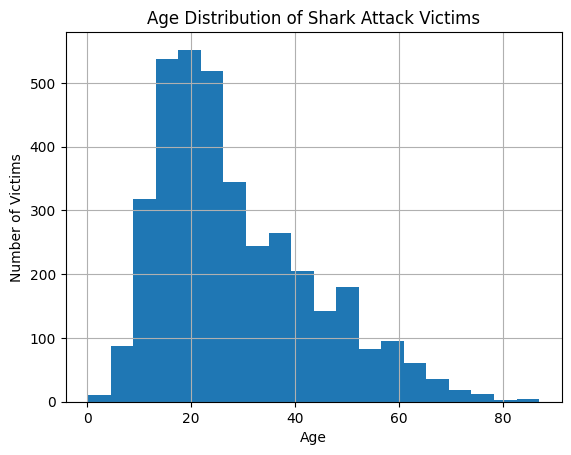

In [107]:
import matplotlib.pyplot as plt
import re

print("Original:")
print(df['Age'].unique())

def clean_age(age):
    if pd.isna(age):
        return np.nan

    age = str(age).lower().strip()

    match = re.search(r'\d+', age)
    if not match:
        return np.nan

    num = float(match.group())

    if "month" in age:
        return num / 12

    return num

df['Age'] = df['Age'].apply(clean_age)

print("Cleaned:")
print(df['Age'].unique())

plt.figure()
df['Age'].dropna().hist(bins=20)
plt.xlabel('Age')
plt.ylabel('Number of Victims')
plt.title('Age Distribution of Shark Attack Victims')
plt.show()

In [108]:
print("Original:")
print(df['Type'].unique())

def clean_type(t):
    if pd.isna(t):
        return "Unknown"

    t = str(t).strip().lower()

    if "unprovoked" in t:
        return "Unprovoked"
    elif "provoked" in t:
        return "Provoked"
    else:
        return "Unknown"

df['Type'] = df['Type'].apply(clean_type)

print("Cleaned:")
print(df['Type'].unique())

unprovoked_proportion = (df['Type'] == 'Unprovoked').mean()

print(f"Proportion of 'Unprovoked' values in Type: {unprovoked_proportion:.4f} ({unprovoked_proportion:.2%})")

Original:
['Unprovoked' 'Provoked' 'Questionable' 'unprovoked' ' Provoked'
 'Watercraft' 'Sea Disaster' nan '?' 'Unconfirmed' 'Unverified' 'Invalid'
 'Under investigation' 'Boat']
Cleaned:
['Unprovoked' 'Provoked' 'Unknown']
Proportion of 'Unprovoked' values in Type: 0.7450 (74.50%)


In [109]:
print("Original:")
print(df['Fatal Y/N'].unique())

df['Fatal Y/N'] = df['Fatal Y/N'].fillna('Unknown')
df['Fatal Y/N'] = df['Fatal Y/N'].astype(str).str.strip().str.upper()

df['Fatal Y/N'] = df['Fatal Y/N'].replace({
    'Y X 2': 'Y',
    'NQ': 'N',
    'UNKNOWN': 'Unknown',
    'F': 'Unknown',
    'M': 'Unknown',
    '2017': 'Unknown',
    ' N': 'N',
    'N': 'N',
    'Y': 'Y'
})

df.loc[~df['Fatal Y/N'].isin(['Y', 'N']), 'Fatal Y/N'] = 'Unknown'

print("Cleaned:")
print(df['Fatal Y/N'].unique())

print(pd.crosstab(df['Type'], df['Fatal Y/N'], margins=True))

Original:
['Y' 'N' 'F' 'M' nan 'n' 'Nq' 'UNKNOWN' 2017 'Y x 2' ' N']
Cleaned:
['Y' 'N' 'Unknown']
Fatal Y/N      N  Unknown    Y   All
Type                                
Provoked     501        9   13   523
Unknown      366      399  124   889
Unprovoked  3379       52  694  4125
All         4246      460  831  5537


**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?

  This paper introduces the concept of "tidy data," a standardized framework for structuring datasets to make data cleaning and analysis more efficient and effective. It argues that a consistent structure (where each variable is a column, each observation is a row, and each type of observational unit is a separate table) simplifies the analytical process by reducing the time typically devoted to data wrangling.

  2. Read the introduction. What is the "tidy data standard" intended to accomplish?

  The "tidy data standard" is intended to provide a universal structure that facilitates data exploration, modeling, and visualization.

  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."

The first sentence means tidy datasets follow a uniform structure (variables in columns, observations in rows), while messy datasets deviate from this structure in diverse, often idiosyncratic ways. The second sentence means that in practice, we can intuitively identify observations (e.g., a person) and variables (e.g., age) in a specific dataset, but general definitions are challenging because the same data can be structured differently depending on context and what is necessary for a given research.

  4. Read Section 2.2. How does Wickham define values, variables, and observations?

A value is a single measurement, either quantitative (number) or qualitative (string). A variable is all values that measure the same underlying attribute (e.g., temperature) across units. An observation is all values measured for the same unit (e.g., a person, day) across attributes.

  5. How is "Tidy Data" defined in section 2.3?

Tidy data is defined by three rules: 1) each variable forms a column, 2) each observation forms a row, and 3) each type of observational unit forms a table.

  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?

The five of the most common problems are: 1) column headers are actually values of a variable (not variable names), 2) multiple variables are stuffed into a single column, 3) variables are stored in both rows and columns, 4) multiple types of observational units are combined in one table, and 5) a single observational unit is spread across multiple tables. Table 4, which shows religion against income brackets, is messy because of the first problem listed. The column headers ("<$10k", "$10-20k") are not variables but are themselves values of an income variable. Melting (or stacking) transforms a dataset by turning columns into rows. It creates two new columns: one for the original column headers (now a variable) and one for the cell values. This helps resolve the "column headers are values" problem.

  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

Table 11 is messy because variables are stored in both rows and columns. The variables tmin (minimum temperature) and tmax (maximum temperature) appear in the "element" column (rows), while days of the month (d1, d2, …) are column headers. Table 12(a) is "molten" because it has been melted: the day columns are collapsed into two new columns ("day" and "value"). However, it is not fully tidy because the variable names (tmin/tmax) remain in the "element" column, and their values are in the "value" column. Table 12(b) is tidy because each variable (id, date, tmax, tmin) has its own column, and each row represents a single day's observations (with both tmax and tmin values).


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.

2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.

The gift amount is heavily right skewed, as there are several outliers coming from actors gifting large amounts. A log scale was necessary to display the data properly.

3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?

Roughly 61% of the gifts are contracts, 39% are monetary gifts, and 0.039% are real estate.

4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?

The countries that sent the most gifts are England, China, Canada, Japan, Switzerland, Saudi Arabia, France, Germany, Hong Kong, South Korea, Qatar, The Netherlands, Korea, India, and Taiwan. The countries that sent the most money overall are Qatar, England, China, Saudi Arabia, Bermuda, Canada, Hong Kong, Japan, Switzerland, India, Germany, the United Arab Emirates, France. Singapore, and Australia.

5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.

The top institutions are Carnegie Mellon University, Cornell University, Harvard University, Massachusetts Institute of Technology, Yale University, Texas A&M University, Johns Hopkins University, Northwestern University, Georgetown University, the University of Chicago, the University of Colorado Boulder, Duke University, Brigham Young University, Stanford University, and the University of Texas MD Anderson Cancer Center.

6. Which giftors provide the most money, in total?

The biggest gifters are the Qatar Foundation, Qatar Foundation/Qatar National Res, Qatar Foundation for Education, Anonymous, Saudi Arabian Cultural Mission, HCL, Church of Jesus Christ of LDS, Emirates Institute for Advanced Sc, QIC, Anonymous #9, Qatar National Research Fund, Government of Saudi Arabia, Contracting Party, CMKL University, Royal Embassy of Saudi Arabia.

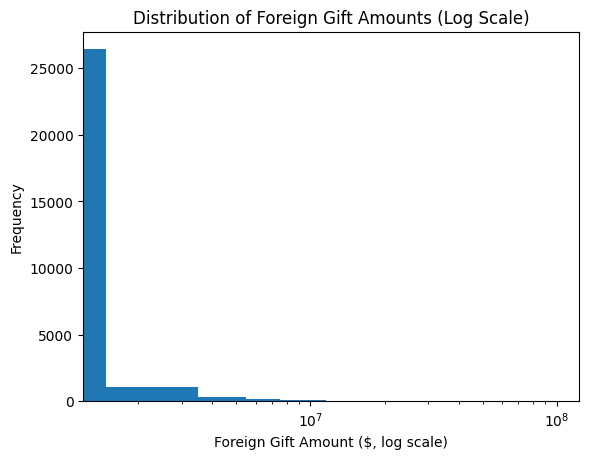

In [11]:
import matplotlib.pyplot as plt

df = pd.read_csv("/content/data/ForeignGifts_edu.csv", encoding = 'latin1')

plt.hist(df['Foreign Gift Amount'], bins=50)
plt.xscale('log')
plt.xlabel("Foreign Gift Amount ($, log scale)")
plt.ylabel("Frequency")
plt.title("Distribution of Foreign Gift Amounts (Log Scale)")
plt.show()

In [12]:
gift_type_counts = df['Gift Type'].value_counts()
gift_type_props = df['Gift Type'].value_counts(normalize=True)

print("Count:")
print(gift_type_counts),

print("Proportion:")
print(gift_type_props)

Count:
Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64
Proportion:
Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: proportion, dtype: float64


In [13]:
top_countries_count = (
    df.groupby('Country of Giftor')
      .count()['Foreign Gift Amount']
      .sort_values(ascending=False)
      .head(15)
)

print("Number of Gifts:")
print(top_countries_count)

top_countries_amount = (
    df.groupby('Country of Giftor')
      .sum(numeric_only=True)['Foreign Gift Amount']
      .sort_values(ascending=False)
      .head(15)
)

print("Total Amount Given:")
print(top_countries_amount)

Number of Gifts:
Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: Foreign Gift Amount, dtype: int64
Total Amount Given:
Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Na

Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64


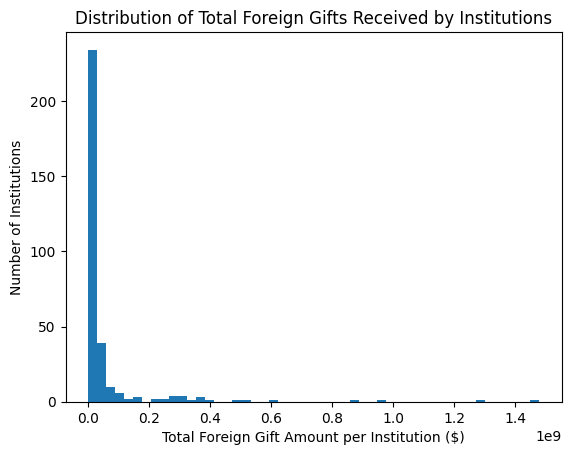

In [14]:
top_institutions = (
    df.groupby('Institution Name')
      .sum(numeric_only=True)['Foreign Gift Amount']
      .sort_values(ascending=False)
      .head(15)
)

print(top_institutions)

inst_totals = (
    df.groupby('Institution Name')['Foreign Gift Amount']
      .sum()
      .dropna()
)

plt.hist(inst_totals, bins=50)
plt.xlabel("Total Foreign Gift Amount per Institution ($)")
plt.ylabel("Number of Institutions")
plt.title("Distribution of Total Foreign Gifts Received by Institutions")
plt.show()

In [15]:
top_giftors = (
    df.groupby('Giftor Name')
      .sum(numeric_only=True)['Foreign Gift Amount']
      .sort_values(ascending=False)
      .head(15)
)

top_giftors


,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497


**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.a

2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.

There are 3798 observations, and 63 variables.

3. Cross tabulate `control` and `level`. Describe the patterns you see in words.

More of the private institutions recorded are four-year, while more of the public institutions recorded are two-year. There are also a lot more four-year private not-for-profit institutions than two-year ones.

4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?

Private not-for-profit institutions have the most favorable graduation rates.

5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

For the first plot, there seems to be a positive correlation with the amount of aid received and graduation rates. From the second plot, there seems to be some positive correlation between aid and graduation rates for public institutions and a stronger positive correlation for private not-for-profit institutions. While there seems to be a possitive correlation for all types of institutions, public and not-for-profit institutions have relatively stronger positive correlations.

In [17]:
import seaborn as sns

df = pd.read_csv("/content/data/college_completion.csv")
print(df.shape)
df.head()

(3798, 63)


,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [18]:
pd.crosstab(df['control'], df['level'])

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


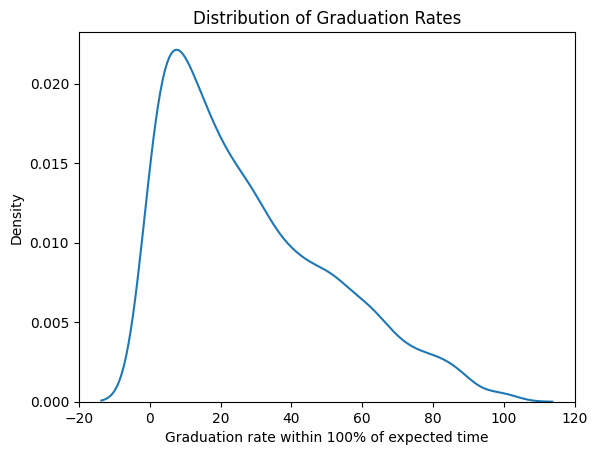

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


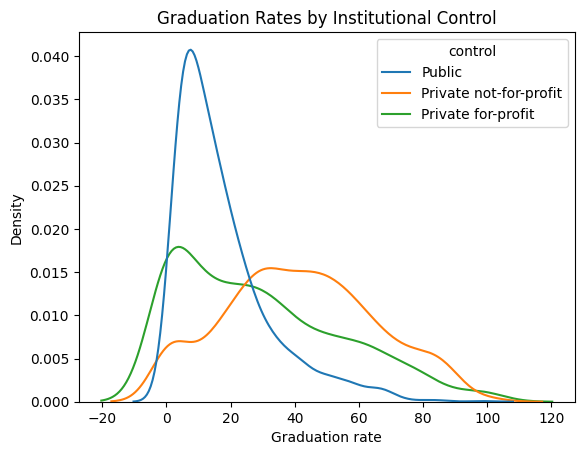

                         count       mean        std  min    25%   50%    75%  \
control                                                                         
Private for-profit       779.0  29.108858  25.601687  0.0   6.95  24.7  46.75   
Private not-for-profit  1189.0  41.660976  23.551231  0.0  25.00  41.0  58.30   
Public                  1499.0  17.430887  14.729443  0.0   6.90  13.2  23.25   

                          max  
control                        
Private for-profit      100.0  
Private not-for-profit  100.0  
Public                   97.8  


In [27]:
sns.kdeplot(df['grad_100_value'].dropna())
plt.xlabel("Graduation rate within 100% of expected time")
plt.title("Distribution of Graduation Rates")
plt.show()

print(df['grad_100_value'].describe())

sns.kdeplot(
    data=df,
    x='grad_100_value',
    hue='control',
    common_norm=False
)
plt.xlabel("Graduation rate")
plt.title("Graduation Rates by Institutional Control")
plt.show()

print(df.groupby('control')['grad_100_value'].describe())

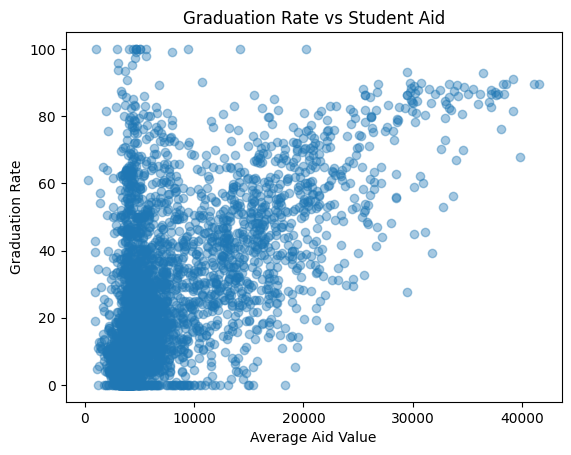

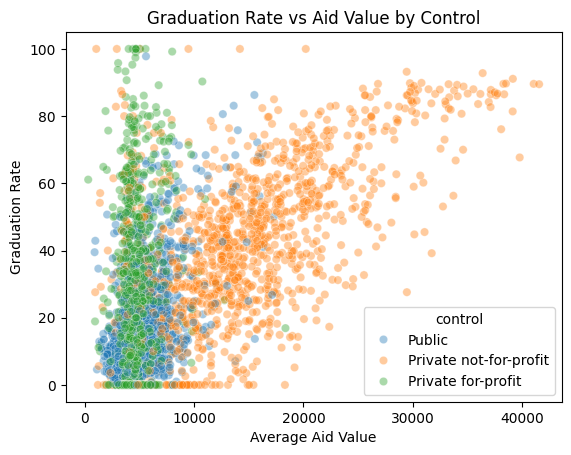

aid_value  grad_100_value
control                                                         
Private for-profit     aid_value        1.000000        0.188363
                       grad_100_value   0.188363        1.000000
Private not-for-profit aid_value        1.000000        0.601591
                       grad_100_value   0.601591        1.000000
Public                 aid_value        1.000000        0.482481
                       grad_100_value   0.482481        1.000000

In [35]:
plt.scatter(df['aid_value'], df['grad_100_value'], alpha=0.4)
plt.xlabel("Average Aid Value")
plt.ylabel("Graduation Rate")
plt.title("Graduation Rate vs Student Aid")
plt.show()

sns.scatterplot(
    data=df,
    x='aid_value',
    y='grad_100_value',
    hue='control',
    alpha=0.4
)
plt.xlabel("Average Aid Value")
plt.ylabel("Graduation Rate")
plt.title("Graduation Rate vs Aid Value by Control")
plt.show()

df.groupby('control')[['aid_value', 'grad_100_value']].corr()

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?